In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
import hvplot.pandas
import requests


#import api key

from api_keys import geoapify_key

In [2]:
# Store filepath in a variable
OPTN_data = Path("Resources/cleaned_OPTN_data.csv")
state_data = Path("Resources/state_totals.csv")

# read the file - AP
kidney_data = pd.read_csv(OPTN_data)
state_totals = pd.read_csv(state_data)

kidney_data.head()


,State,Total,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years,Payment type,Blood type,Age,Ethnicity,Sex
0,Alabama,455,9,22,61,101,146,73,54,40,NaN,NaN,NaN,NaN,Female
1,Alabama,713,16,38,87,150,237,135,95,43,NaN,NaN,NaN,NaN,Male
2,Alabama,787,5,7,72,169,267,146,97,48,Public insurance - Medicare FFS (Fee for Service),NaN,NaN,NaN,NaN
3,Alabama,688,9,32,88,154,215,122,93,57,NaN,NaN,NaN,"Black, Non-Hispanic",NaN
4,Alabama,631,14,30,80,136,209,124,81,46,NaN,O,NaN,NaN,NaN


In [3]:
# ignoring commas

kidney_data["Total"] = kidney_data["Total"].str.replace(",", "")
kidney_data["< 30 days"] = kidney_data["< 30 days"].str.replace(",", "")
kidney_data["30 to < 90 days"] = kidney_data["30 to < 90 days"].str.replace(",", "")
kidney_data["90 days to < 6 months"] = kidney_data["90 days to < 6 months"].str.replace(",", "")
kidney_data["6 months to < 1 year"] = kidney_data["6 months to < 1 year"].str.replace(",", "")
kidney_data["1 year to < 2 years"] = kidney_data["1 year to < 2 years"].str.replace(",", "")
kidney_data["2 years to < 3 years"] = kidney_data["2 years to < 3 years"].str.replace(",", "")
kidney_data["3 years to < 5 years"] = kidney_data["3 years to < 5 years"].str.replace(",", "")
kidney_data["> 5 years"] = kidney_data["> 5 years"].str.replace(",", "")

In [4]:
# need to type total and wait time columns as integers
kidney_data["Total"] = kidney_data["Total"].astype(int)
kidney_data["< 30 days"] = kidney_data["< 30 days"].astype(int)
kidney_data["30 to < 90 days"] = kidney_data["30 to < 90 days"].astype(int)
kidney_data["90 days to < 6 months"] = kidney_data["90 days to < 6 months"].astype(int)
kidney_data["6 months to < 1 year"] = kidney_data["6 months to < 1 year"].astype(int)
kidney_data["1 year to < 2 years"] = kidney_data["1 year to < 2 years"].astype(int)
kidney_data["2 years to < 3 years"] = kidney_data["2 years to < 3 years"].astype(int)
kidney_data["3 years to < 5 years"] = kidney_data["3 years to < 5 years"].astype(int)
kidney_data["> 5 years"] = kidney_data["> 5 years"].astype(int)

In [5]:
# testing
# variable = kidney_data.loc[(kidney_data["Sex"] == "Female") & (kidney_data["State"] == "Oklahoma"), "Total"].values[0]
# variable

# Oklahoma

In [6]:
# Total candidates for Oklahoma

ok_totals1 = kidney_data.loc[kidney_data["State"] == "Oklahoma"]
ok_male_totals = ok_totals1.loc[ok_totals1["Sex"] == "Male"]["Total"].values[0]
ok_female_totals = ok_totals1.loc[ok_totals1["Sex"] == "Female"]["Total"].values[0]
ok_totals = ok_male_totals + ok_female_totals
ok_totals

597

## Wait time by blood type in Oklahoma

In [7]:
# Total for each blood type

ok_blood_type_O = ok_totals1.loc[ok_totals1["Blood type"] == "O"]["Total"].values[0]
ok_blood_type_A = ok_totals1.loc[ok_totals1["Blood type"] == "A"]["Total"].values[0]
ok_blood_type_B = ok_totals1.loc[ok_totals1["Blood type"] == "B"]["Total"].values[0]
ok_blood_type_AB = ok_totals1.loc[ok_totals1["Blood type"] == "AB"]["Total"].values[0]
print(ok_blood_type_O)
print(ok_blood_type_A)
print(ok_blood_type_B)
print(ok_blood_type_AB)

341
188
65
3


In [8]:
# OK blood type totals dataframe

ok_blood_type_totals = pd.DataFrame({"Blood type":["O", "A", "B", 
                                        "AB"], "Candidates":[ok_blood_type_O, ok_blood_type_A, ok_blood_type_B, 
                                                             ok_blood_type_AB]})
ok_blood_type_totals

,Blood type,Candidates
0,O,341
1,A,188
2,B,65
3,AB,3


In [43]:
# Hypothesis testing

# Assuming even distribution of people amongst blood types - mean of 149
# Degree of freedom is 4-1 = 3
# p-value = 0.05
# Reset index to blood type

ok_blood_type_totals["Expected"] = 149.25

ok_blood_type_totals.set_index("Blood type")

critical_value = stats.chi2.ppf(q = 0.95, df = 3)
print(critical_value)


7.814727903251179


In [45]:
# Null hypothesis is that number of candidates is evenly distributed amongst blood types

stats.chisquare(ok_blood_type_totals['Candidates'], ok_blood_type_totals['Expected'])

Power_divergenceResult(statistic=447.2814070351759, pvalue=1.2655367084022157e-96)

In [9]:
# Creating blood type vs wait time dataframe

ok_blood_type_wait = pd.DataFrame(ok_totals1[["Blood type","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_blood_type_wait

,Blood type,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1067,O,16,24,39,64,82,70,48,15
1071,A,14,15,21,46,47,25,15,7
1078,B,3,9,7,13,13,8,9,5
1088,AB,0,0,1,0,1,1,0,0


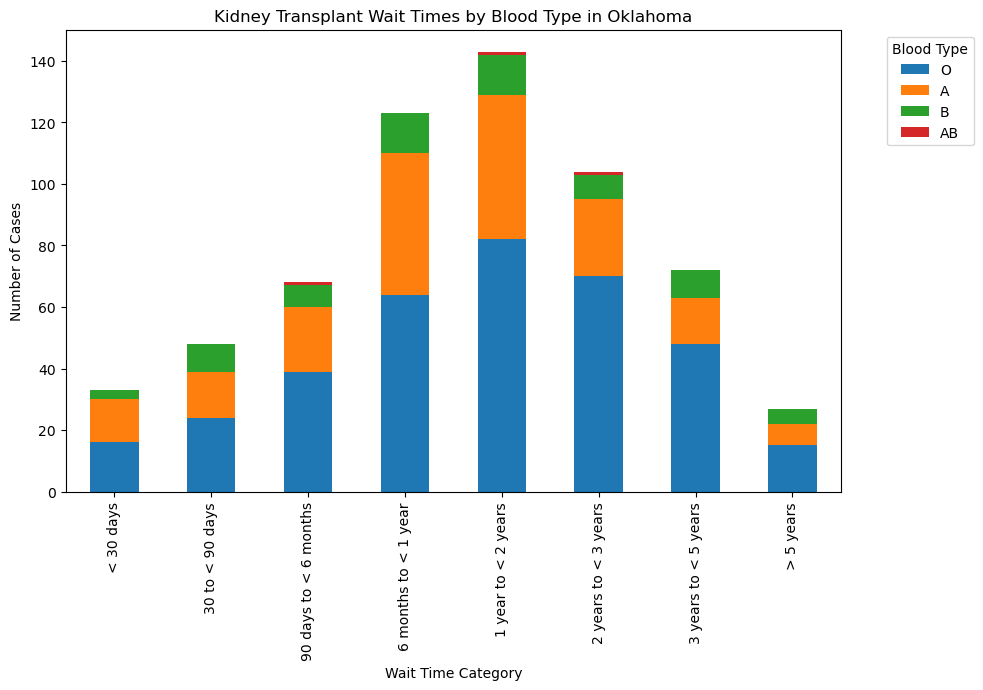

In [10]:
# Plot above on bar chart

# Set Blood type as the index
ok_blood_data = ok_blood_type_wait.set_index("Blood type")

# Transpose the DataFrame for easier plotting: https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php
ok_blood_data = ok_blood_data.transpose()

# Plot the bar chart
ok_blood_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Blood Type in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Blood Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [11]:
# Dataframes for each blood type with wait times

# Used the following code to identify the number values assigned to each wait time for each blood type:
#ok_blood_type_O_df = ok_blood_type_wait.loc[ok_blood_type_wait["Blood type"] == "O"].transpose().reset_index()
#ok_blood_type_O_df


ok_blood_type_O_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[16, 24, 39, 64, 82, 70, 48, 15]})
print(ok_blood_type_O_df)
print("")

ok_blood_type_A_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[14, 15, 21, 46, 47, 25, 15, 7]})
print(ok_blood_type_A_df)
print("")

ok_blood_type_B_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[3, 9, 7, 13, 13, 8, 9, 5]})
print(ok_blood_type_B_df)
print("")

ok_blood_type_AB_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[0, 0, 1, 0, 1, 1, 0, 0]})

print(ok_blood_type_AB_df)
print("")

               Wait time  Candidates
0              < 30 days          16
1        30 to < 90 days          24
2  90 days to < 6 months          39
3   6 months to < 1 year          64
4    1 year to < 2 years          82
5   2 years to < 3 years          70
6   3 years to < 5 years          48
7              > 5 years          15

               Wait time  Candidates
0              < 30 days          14
1        30 to < 90 days          15
2  90 days to < 6 months          21
3   6 months to < 1 year          46
4    1 year to < 2 years          47
5   2 years to < 3 years          25
6   3 years to < 5 years          15
7              > 5 years           7

               Wait time  Candidates
0              < 30 days           3
1        30 to < 90 days           9
2  90 days to < 6 months           7
3   6 months to < 1 year          13
4    1 year to < 2 years          13
5   2 years to < 3 years           8
6   3 years to < 5 years           9
7              > 5 years           5

## Wait time by sex in Oklahoma

In [13]:
# Oklahoma total for each sex

ok_sex_male = ok_totals1.loc[ok_totals1["Sex"] == "Male"]["Total"].values[0]
ok_sex_female = ok_totals1.loc[ok_totals1["Sex"] == "Female"]["Total"].values[0]

print(ok_sex_male)
print(ok_sex_female)

381
216


In [14]:
# OK sex totals dataframe

ok_sex_totals = pd.DataFrame({"Sex":["Female", "Male"], "Candidates":[ok_sex_female, 
                                                                                   ok_sex_male]})
ok_sex_totals

,Sex,Candidates
0,Female,216
1,Male,381


In [47]:
# Hypothesis testing

# Assuming even distribution of people amongst sexes - mean of 298.5
# Degree of freedom is 2-1 = 1
# p-value = 0.05
# Reset index to sex

ok_sex_totals["Expected"] = 298.5

ok_sex_totals.set_index("Sex")

critical_value = stats.chi2.ppf(q = 0.95, df = 1)
print(critical_value)

3.841458820694124


In [48]:
# Null hypothesis is that number of candidates is evenly distributed amongst sexes

stats.chisquare(ok_sex_totals['Candidates'], ok_sex_totals['Expected'])

Power_divergenceResult(statistic=45.60301507537689, pvalue=1.4481849200081834e-11)

In [15]:
# Creating sex vs wait time dataframe

ok_sex_wait = pd.DataFrame(ok_totals1[["Sex","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_sex_wait

,Sex,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1065,Female,10,17,25,45,43,39,32,11
1066,Male,23,31,43,78,100,65,40,16


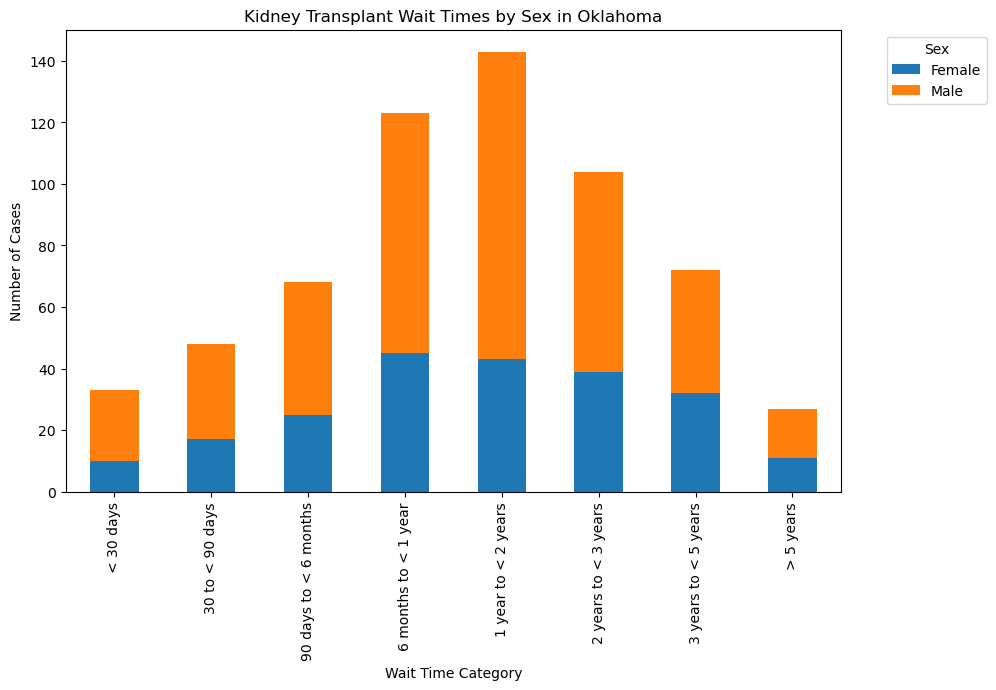

In [16]:
# Plot above on a bar chart
# Set Blood type as the index
ok_sex_data = ok_sex_wait.set_index("Sex")

# Transpose the DataFrame for easier plotting: https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php
ok_sex_data = ok_sex_data.transpose()

# Plot the bar chart
ok_sex_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Sex in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Sex", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [17]:
# Creating dataframes for each sex with wait times

# Used the following code to identify the number values assigned to each wait time for each sex:
#ok_sex_female_df = ok_sex_wait.loc[ok_sex_wait["Sex"] == "Female"].transpose().reset_index()
#ok_sex_female_df


ok_sex_male_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[23, 31, 43, 78, 100, 65, 40, 16]})
print(ok_sex_male_df)
print("")

ok_sex_female_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[10, 17, 25, 45, 43, 39, 32, 11]})
print(ok_sex_female_df)
print("")

               Wait time  Candidates
0              < 30 days          23
1        30 to < 90 days          31
2  90 days to < 6 months          43
3   6 months to < 1 year          78
4    1 year to < 2 years         100
5   2 years to < 3 years          65
6   3 years to < 5 years          40
7              > 5 years          16

               Wait time  Candidates
0              < 30 days          10
1        30 to < 90 days          17
2  90 days to < 6 months          25
3   6 months to < 1 year          45
4    1 year to < 2 years          43
5   2 years to < 3 years          39
6   3 years to < 5 years          32
7              > 5 years          11



## Wait time by ethnicity in Oklahoma

In [19]:
# Total for each ethnicity in Oklahoma

# Total of totals = 599 which is more than the 597 total Oklahoma candidates? Was getting errors on H due to ethnicity
#   type not existing for Oklahoma

ok_ethnicity_type_A = ok_totals1.loc[ok_totals1["Ethnicity"] == "White, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_B = ok_totals1.loc[ok_totals1["Ethnicity"] == "Black, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_C = ok_totals1.loc[ok_totals1["Ethnicity"] == "Hispanic/Latino"]["Total"].values[0]
ok_ethnicity_type_D = ok_totals1.loc[ok_totals1["Ethnicity"] == "Asian, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_E = ok_totals1.loc[ok_totals1["Ethnicity"] == "Multiracial, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_F = ok_totals1.loc[ok_totals1["Ethnicity"] == "American Indian/Alaska Native, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_G = ok_totals1.loc[ok_totals1["Ethnicity"] == "Pacific Islander, Non-Hispanic"]["Total"].values[0]
#ok_ethnicity_type_H = ok_totals1.loc[ok_totals1["Ethnicity"] == "Unknown"]["Total"].values[0]

print(ok_ethnicity_type_A)
print(ok_ethnicity_type_B)
print(ok_ethnicity_type_C)
print(ok_ethnicity_type_D)
print(ok_ethnicity_type_E)
print(ok_ethnicity_type_F)
print(ok_ethnicity_type_G)
#print(ok_ethnicity_type_H)

304
113
65
27
18
68
4


In [68]:
# OK ethnicity totals dataframe

ok_ethnicity_totals = pd.DataFrame({"Ethnicity":["White, Non-Hispanic", "Black, Non-Hispanic", "Hispanic/Latino", 
                                                 "Asian, Non-Hispanic", "Multiracial, Non-Hispanic",
                                                "American Indian/Alaska Native, Non-Hispanic", 
                                                 "Pacific Islander, Non-Hispanic"], "Candidates":[ok_ethnicity_type_A, 
                                                                                                  ok_ethnicity_type_B, 
                                                                                                  ok_ethnicity_type_C, 
                                                                                                  ok_ethnicity_type_D, 
                                                                                                  ok_ethnicity_type_E, 
                                                                                                  ok_ethnicity_type_F, 
                                                                                                  ok_ethnicity_type_G]})
ok_ethnicity_totals

,Ethnicity,Candidates
0,"White, Non-Hispanic",304
1,"Black, Non-Hispanic",113
2,Hispanic/Latino,65
3,"Asian, Non-Hispanic",27
4,"Multiracial, Non-Hispanic",18
5,"American Indian/Alaska Native, Non-Hispanic",68
6,"Pacific Islander, Non-Hispanic",4


In [69]:
# Issue with the mean because it has so many points after the decimal

#Hypothesis testing

# Assuming even distribution of people amongst ethnicity - mean of 85.285714285714285714285714285714
# Degree of freedom is 7-1 = 6
# p-value = 0.05
# Reset index to ethnicity

#ok_ethnicity_totals["Expected"] = 0
#ok_ethnicity_totals["Expected"].astype(float)
#ok_ethnicity_totals["Expected"] = 85.285714285714285714285714285714

#ok_ethnicity_totals.set_index("Ethnicity")

#critical_value = stats.chi2.ppf(q = 0.95, df = 6)
#print(critical_value)

In [70]:
# Null hypothesis is that number of candidates is evenly distributed amongst ethnicities

#stats.chisquare(ok_ethnicity_totals['Candidates'], ok_ethnicity_totals['Expected'])

In [71]:
# Creating ethnicity vs wait time dataframe

ok_ethnicity_wait = pd.DataFrame(ok_totals1[["Ethnicity","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_ethnicity_wait

,Ethnicity,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1068,"White, Non-Hispanic",19,25,35,63,77,55,35,11
1075,"Black, Non-Hispanic",5,6,15,22,25,16,18,9
1077,"American Indian/Alaska Native, Non-Hispanic",2,5,6,15,19,12,6,3
1079,Hispanic/Latino,5,6,6,15,11,13,8,3
1082,"Asian, Non-Hispanic",1,4,3,6,8,2,2,1
1083,"Multiracial, Non-Hispanic",1,2,3,2,1,7,2,0
1086,"Pacific Islander, Non-Hispanic",0,0,0,1,2,0,1,0


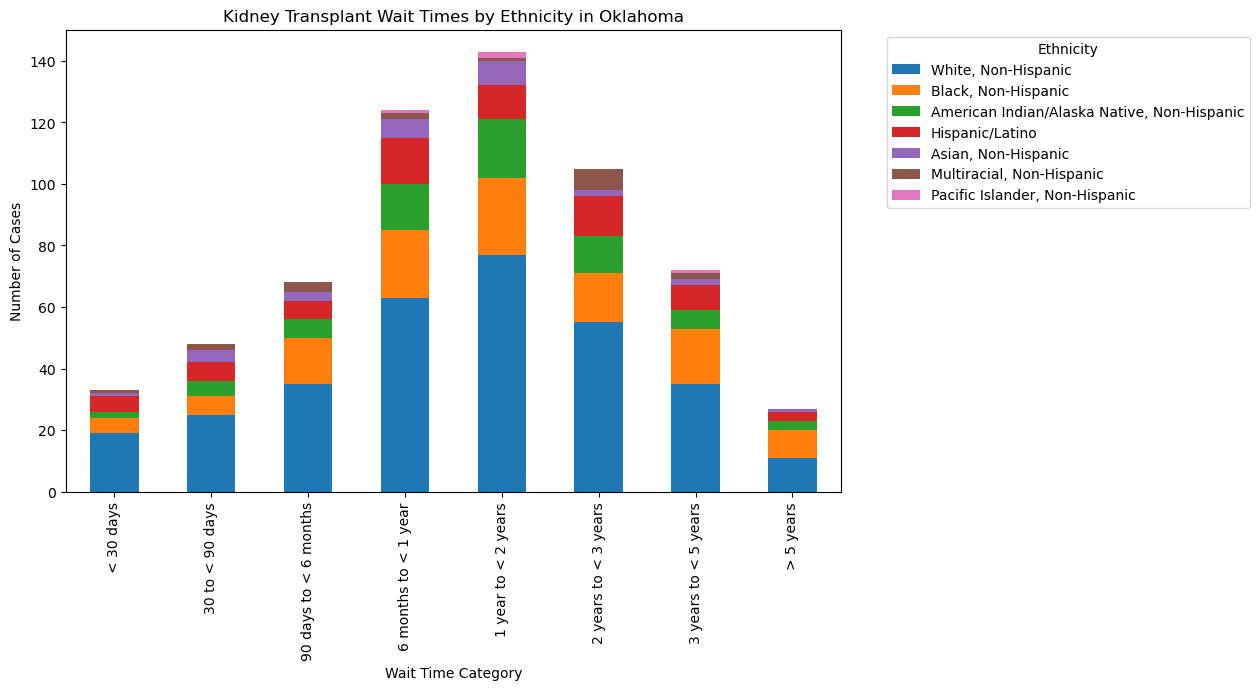

In [22]:
# Plot above on a bar chart

# Set Ethnicity as the index
ethnicity_data_for_plot = ok_ethnicity_wait.set_index("Ethnicity")

# Transpose the DataFrame for easier plotting
ethnicity_data_for_plot = ethnicity_data_for_plot.transpose()

# Plot the bar chart
ethnicity_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Ethnicity in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Ethnicity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [23]:
# Creating dataframes for each ethnicity with wait times

# Used the following code to identify the number values assigned to each wait time for each ethnicity:
# ok_ethnicity_type_A_df = ok_ethnicity_wait.loc[ok_ethnicity_wait["Ethnicity"] == "White, Non-Hispanic"].transpose().reset_index()
# ok_ethnicity_type_A_df


# White, Non-Hispanic
ok_ethnicity_type_A_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[19, 25, 35, 63, 77, 55, 35, 11]})
print(ok_ethnicity_type_A_df)
print("")


# Black, Non-Hispanic
ok_ethnicity_type_B_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[14, 15, 21, 46, 47, 25, 15, 7]})
print(ok_ethnicity_type_B_df)
print("")


# American Indian/Alaska Native, Non-Hispanic	
ok_ethnicity_type_C_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[5, 6, 6, 15, 11, 13, 8, 3]})
print(ok_ethnicity_type_C_df)
print("")


# Hispanic/Latino
ok_ethnicity_type_D_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[1, 4, 3, 6, 8, 2, 2, 1]})

print(ok_ethnicity_type_D_df)
print("")


# Asian, Non-Hispanic
ok_ethnicity_type_E_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[1, 2, 3, 2, 1, 7, 2, 0]})
print(ok_ethnicity_type_E_df)
print("")


# Multiracial, Non-Hispanic
ok_ethnicity_type_F_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[2, 5, 6, 15, 19, 12, 6, 3]})
print(ok_ethnicity_type_F_df)
print("")


# Pacific Islander, Non-Hispanic
ok_ethnicity_type_G_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[0, 0, 0, 1, 2, 0, 1, 0]})
print(ok_ethnicity_type_G_df)
print("")


# For national data - will include 'Unknown' category of ethnicity - find candidate values first:
# ethnicity_type_H_df = NTL_DF.loc[NTL_DF["Ethnicity"] == "Unknown"].transpose().reset_index()
# ethnicity_type_H_df

# Unknown
# ethnicity_type_H_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
#                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
#                                        "3 years to < 5 years", "> 5 years"], "Candidates":[?, ?, ?, ?, ?, ?, ?, ?]})

#print(ethnicity_type_H_df)
#print("")

               Wait time  Candidates
0              < 30 days          19
1        30 to < 90 days          25
2  90 days to < 6 months          35
3   6 months to < 1 year          63
4    1 year to < 2 years          77
5   2 years to < 3 years          55
6   3 years to < 5 years          35
7              > 5 years          11

               Wait time  Candidates
0              < 30 days          14
1        30 to < 90 days          15
2  90 days to < 6 months          21
3   6 months to < 1 year          46
4    1 year to < 2 years          47
5   2 years to < 3 years          25
6   3 years to < 5 years          15
7              > 5 years           7

               Wait time  Candidates
0              < 30 days           5
1        30 to < 90 days           6
2  90 days to < 6 months           6
3   6 months to < 1 year          15
4    1 year to < 2 years          11
5   2 years to < 3 years          13
6   3 years to < 5 years           8
7              > 5 years           3

## Wait time by age group in Oklahoma

In [25]:
# Total for each age group in Oklahoma

# Was getting errors on A and C due to age group not existing for Oklahoma

#ok_age_group_A = ok_totals1.loc[ok_totals1["Age"] == "< 1 Year"]["Total"].values[0]
ok_age_group_B = ok_totals1.loc[ok_totals1["Age"] == "1-5 Years"]["Total"].values[0]
#ok_age_group_C = ok_totals1.loc[ok_totals1["Age"] == "6-10 Years"]["Total"].values[0]
ok_age_group_D = ok_totals1.loc[ok_totals1["Age"] == "11-17 Years"]["Total"].values[0]
ok_age_group_E = ok_totals1.loc[ok_totals1["Age"] == "18-34 Years"]["Total"].values[0]
ok_age_group_F = ok_totals1.loc[ok_totals1["Age"] == "35-49 Years"]["Total"].values[0]
ok_age_group_G = ok_totals1.loc[ok_totals1["Age"] == "50-64 Years"]["Total"].values[0]
ok_age_group_H = ok_totals1.loc[ok_totals1["Age"] == "65 +"]["Total"].values[0]

#print(ok_age_group_A)
print(ok_age_group_B)
#print(ok_age_group_C)
print(ok_age_group_D)
print(ok_age_group_E)
print(ok_age_group_F)
print(ok_age_group_G)
print(ok_age_group_H)

6
2
63
129
247
150


In [72]:
# Hypothesis testing

#Assuming even distribution of people amongst age groups - mean of 99.5
# Degree of freedom is 6-1 = 5
# p-value = 0.05
# Reset index to age

ok_age_totals["Expected"] = 99.5

ok_age_totals.set_index("Age")

critical_value = stats.chi2.ppf(q = 0.95, df = 5)
print(critical_value)

11.070497693516351


In [73]:
# Null hypothesis is that number of candidates is evenly distributed amongst age groups

stats.chisquare(ok_age_totals['Candidates'], ok_age_totals['Expected'])

Power_divergenceResult(statistic=449.82412060301505, pvalue=5.3605507096331644e-95)

In [26]:
# OK ethnicity totals dataframe

ok_age_totals = pd.DataFrame({"Age":["1-5 Years", "11-17 Years", "18-34 Years", "35-49 Years", "50-64 Years", "65 +"], 
                              "Candidates":[ok_age_group_B, ok_age_group_D, ok_age_group_E, ok_age_group_F, 
                                            ok_age_group_G, ok_age_group_H]})
ok_age_totals

,Age,Candidates
0,1-5 Years,6
1,11-17 Years,2
2,18-34 Years,63
3,35-49 Years,129
4,50-64 Years,247
5,65 +,150


In [27]:
# Creating age vs wait time dataframe

ok_age_wait = pd.DataFrame(ok_totals1[["Age","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_age_wait

,Age,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1070,50-64 Years,12,23,39,47,61,40,28,10
1073,65 +,8,7,13,33,37,28,21,7
1074,35-49 Years,8,10,7,30,29,22,15,10
1080,18-34 Years,3,6,9,13,15,11,8,0
1085,1-5 Years,2,1,0,0,1,2,0,0
1090,11-17 Years,0,1,0,0,0,1,0,0


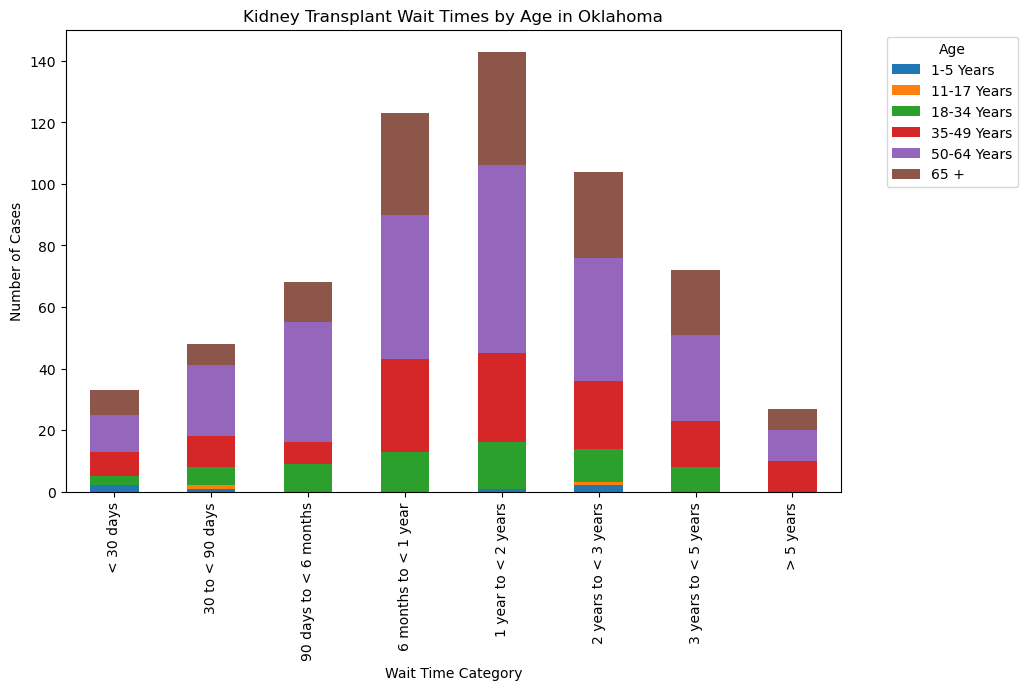

In [28]:
# Plot above on a bar chart
# Set 'Age' as the index
age_data_for_plot = ok_age_wait.set_index("Age")

# Specify the desired order of ages
ordered_ages = ["1-5 Years", "11-17 Years", "18-34 Years", "35-49 Years", "50-64 Years", "65 +"]

# Reorder the rows based on the desired order
age_data_for_plot = age_data_for_plot.loc[ordered_ages]

# Transpose the DataFrame for easier plotting
age_data_for_plot = age_data_for_plot.transpose()

# Plot the bar chart
age_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Age in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [30]:
# Creating dataframes for each age group with wait times

# Used the following code to identify the number values assigned to each wait time for each age group:
# ok_age_type_A_df = ok_age_wait.loc[ok_age_wait["Age"] == "< 1 Year"].transpose().reset_index()
# ok_age_type_A_df


# For national data - will include < 1 Year category of age
# age_type_A_df = NTL_DF.loc[NTL_DF["Age"] == "< 1 Year"].transpose().reset_index()
# age_type_A_df

# < 1 Year
# age_type_A_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
#                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
#                                        "3 years to < 5 years", "> 5 years"], "Candidates":[?, ?, ?, ?, ?, ?, ?, ?]})

#print(age_type_A_df)
#print("")


# 1-5 Years
ok_age_type_B_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[2, 1, 0, 0, 1, 2, 0, 0]})
print(ok_age_type_B_df)
print("")


# For national data - will include 6-10 Years category of age - to find values first do:
# age_type_C_df = NTL_DF.loc[NTL_DF["Age"] == "6-10 Years"].transpose().reset_index()
# age_type_C_df

# 6-10 Years
#age_type_C_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
#                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
#                                        "3 years to < 5 years", "> 5 years"], "Candidates":[?, ?, ?, ?, ?, ?, ?, ?]})
#print(age_type_C_df)
#print("")


# 11-17 Years
ok_age_type_D_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[0, 1, 0, 0, 0, 1, 0, 0]})

print(ok_age_type_D_df)
print("")


# 18-34 Years
ok_age_type_E_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[1, 2, 3, 2, 1, 7, 2, 0]})
print(ok_age_type_E_df)
print("")


# 35-49 Years
ok_age_type_F_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[8, 10, 7, 30, 29, 22, 15, 10]})
print(ok_age_type_F_df)
print("")


# 50-64 Years
ok_age_type_G_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[12, 23, 39, 47, 61, 40, 28, 10]})
print(ok_age_type_G_df)
print("")


# 65 +
ok_age_type_H_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[8, 7, 13, 33, 37, 28, 21, 7]})

print(ok_age_type_H_df)
print("")

               Wait time  Candidates
0              < 30 days           2
1        30 to < 90 days           1
2  90 days to < 6 months           0
3   6 months to < 1 year           0
4    1 year to < 2 years           1
5   2 years to < 3 years           2
6   3 years to < 5 years           0
7              > 5 years           0

               Wait time  Candidates
0              < 30 days           0
1        30 to < 90 days           1
2  90 days to < 6 months           0
3   6 months to < 1 year           0
4    1 year to < 2 years           0
5   2 years to < 3 years           1
6   3 years to < 5 years           0
7              > 5 years           0

               Wait time  Candidates
0              < 30 days           1
1        30 to < 90 days           2
2  90 days to < 6 months           3
3   6 months to < 1 year           2
4    1 year to < 2 years           1
5   2 years to < 3 years           7
6   3 years to < 5 years           2
7              > 5 years           0

In [ ]:
#group0 = ok_blood_type_totals["Candidates"]
#group1 = ok_sex_totals["Candidates"]
#group2 = ok_ethnicity_totals["Candidates"]
#group3 = ok_age_totals["Candidates"]

# National

In [31]:
#Print State Totals

state_totals.head()

,State,Total,< 30 Days,30 to < 90 Days,90 Days to < 6 Months,6 Months to < 1 Year,1 Year to < 2 Years,2 Years to < 3 Years,3 Years to < 5 Years,5 or More Years
0,Alabama,1166,25,60,148,251,383,208,149,83
1,Alaska,118,3,2,11,18,18,23,29,15
2,Arizona,1035,54,123,158,186,212,113,99,100
3,Arkansas,343,25,48,46,67,100,32,37,22
4,California,17409,454,893,1154,2188,3476,2463,3779,3699


In [32]:
#Add columns to the state Totals for Lat and Lng
state_totals ["Lat"] = ""
state_totals["Lon"] = ""
state_totals.head()

,State,Total,< 30 Days,30 to < 90 Days,90 Days to < 6 Months,6 Months to < 1 Year,1 Year to < 2 Years,2 Years to < 3 Years,3 Years to < 5 Years,5 or More Years,Lat,Lon
0,Alabama,1166,25,60,148,251,383,208,149,83,,
1,Alaska,118,3,2,11,18,18,23,29,15,,
2,Arizona,1035,54,123,158,186,212,113,99,100,,
3,Arkansas,343,25,48,46,67,100,32,37,22,,
4,California,17409,454,893,1154,2188,3476,2463,3779,3699,,


In [33]:
#Set search parameters
params = {
        "apiKey" : geoapify_key,
        "format":"json"
}
base_url = "https://api.geoapify.com/v1/geocode/search"



In [34]:
# Print a message to follow up the airport search
print("Starting state search")

# Loop through the cities_pd DataFrame and search coordinates for each city
for index, row in state_totals.iterrows():

    # Get the state's name & add ", United States of America" to the string so geoapify finds the correct city
    state = row["State"] + ", United States of America"

    # Add the current city to the parameters
    params["text"] = f"{state}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert response to JSON
    response = response.json()

    # Extract latitude and longitude
    state_totals.loc[index, "Lat"] = response["results"][0]["lat"]
    state_totals.loc[index, "Lon"] = response["results"][0]["lon"]
    
    # Log the search results
    print(f"Coordinates for {state} fetched...")

# Display sample data to confirm that the coordinates appear
state_totals.head()

Starting state search
Coordinates for Alabama, United States of America fetched...
Coordinates for Alaska, United States of America fetched...
Coordinates for Arizona, United States of America fetched...
Coordinates for Arkansas, United States of America fetched...
Coordinates for California, United States of America fetched...
Coordinates for Colorado, United States of America fetched...
Coordinates for Connecticut, United States of America fetched...
Coordinates for Delaware, United States of America fetched...
Coordinates for District of Columbia, United States of America fetched...
Coordinates for Florida, United States of America fetched...
Coordinates for Georgia, United States of America fetched...
Coordinates for Hawaii, United States of America fetched...
Coordinates for Idaho, United States of America fetched...
Coordinates for Illinois, United States of America fetched...
Coordinates for Indiana, United States of America fetched...
Coordinates for Iowa, United States of Amer

,State,Total,< 30 Days,30 to < 90 Days,90 Days to < 6 Months,6 Months to < 1 Year,1 Year to < 2 Years,2 Years to < 3 Years,3 Years to < 5 Years,5 or More Years,Lat,Lon
0,Alabama,1166,25,60,148,251,383,208,149,83,33.258882,-86.829534
1,Alaska,118,3,2,11,18,18,23,29,15,64.445961,-149.680909
2,Arizona,1035,54,123,158,186,212,113,99,100,34.395342,-111.763275
3,Arkansas,343,25,48,46,67,100,32,37,22,35.204888,-92.447911
4,California,17409,454,893,1154,2188,3476,2463,3779,3699,36.701463,-118.755997


In [35]:
%%capture --no-display

# Configure the map plot
state_map = state_totals.hvplot.points( "Lon",
                                    "Lat",
                                    geo = True,
                                    color = "State",
                                    tiles = "OSM",
                                    frame_width = 800,
                                    frame_height = 600,
                                    size = "Total",
                                    scale = 0.3,
                                    hover_cols = ["State", "Total"]
                                    )

# Display the map
state_map

#Save the image
#plt.savefig("../Resources/state_map.png")

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (State,Total)